# 이미지 데이터 증강(Image Data Augmentation)
- 이미지 데이터셋을 확장하고 모델의 일반화 성능을 높이기 위해 원본 이미지에서 다양한 변형을 생성하는 기법
- 이 과정은 모델이 제한된 데이터셋으로 학습하더라도 더 많은 양의 데이터를 활용하는 효과를 줄 수 있음
- 이미지 증강을 통해 데이터셋의 크기가 증가하고 다양성이 높아져, 모델이 오버피팅을 줄이고 예측 성능을 개선할 수 있음
- 주요 이미지 증강 방법
    - 회전(Rotation)
    > 이미지를 임의의 각도로 회전시켜 다양한 각도에서 물체를 학습할 수 있도록 한다.
    - 수평/수직 뒤집기(Flipping)
    > 이미지의 좌우나 상하를 뒤집어 다양한 시각에서 학습을 촉진한다.
    - 자르기(Cropping)
    > 이미지의 일부를 잘라내어 모델이 물체의 일부분만으로도 인식할 수 있도록 도와준다.
    - 크기 조정(Scaling)
    > 이미지를 크거나 작게 확대 및 축소하여 다양한 비율의 객체를 학습할 수 있도록 한다.
    - 색상 조정(Color Jittering)
    > 색상, 밝기, 대비를 변경하여 조명이나 환경이 달라지는 상황에 대한 견고성을 높인다.
    - 노이즈 추가(Adding Noise)
    > 이미지에 랜덤 노이즈를 추가하여 모델이 데이터의 잡음에도 강인하도록 학습한다.

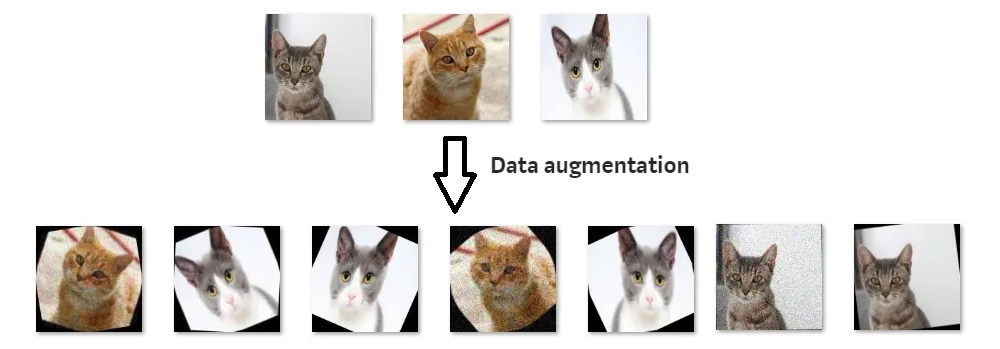

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
SEED = 42
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from glob import glob

In [4]:
cats_list = sorted(glob("../data/cats_and_dogs/train/cats/*.jpg"))
dogs_list = sorted(glob("../data/cats_and_dogs/train/dogs/*.jpg"))

len(cats_list), len(dogs_list)

(1000, 1000)

- 정답 데이터 만들기
    - 고양이 : 0
    - 개 : 1

In [5]:
img_path = cats_list + dogs_list
labels = [0] * len(cats_list) + [1] * len(dogs_list)

train_path = np.array(img_path)
target = np.array(labels)

- 섞어주기

In [6]:
np.random.seed(SEED)
idx_list = np.arange(train_path.shape[0])

np.random.shuffle(idx_list)
np.random.shuffle(idx_list)

train_path = train_path[idx_list]
target = target[idx_list]

- 이진 분류 문제에서 주의할 점(pytorch)
    - 정답 데이터는 2차원 형태, 데이터 타입은 float32

In [7]:
target = target.reshape(-1, 1)
target.shape

(2000, 1)

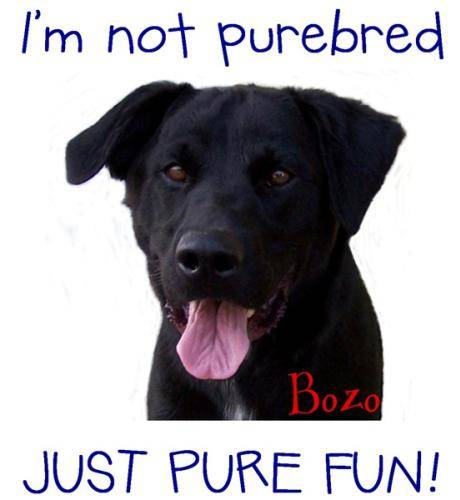

In [8]:
from PIL import Image

img_path = train_path[0]
pil_img = Image.open(img_path)
pil_img

In [9]:
np.array(pil_img).shape

(500, 460, 3)

# torchvision 라이브러리의 transforms 모듈의 다양한 클래스
- 다양한 이미지 변환 기능을 제공

In [10]:
from torchvision import transforms

## ToTensor 클래스
- 이미지 배열을 텐서로 변환
    - minmax 스케일링 후 차원 순서를 channel, height, width 순으로 반환
- pillow 객체, ndarray 전달 가능
    - 단, ndarray의 경우 데이터타입이 uint8 형태

In [11]:
trans = transforms.ToTensor()
trans(pil_img).shape

torch.Size([3, 500, 460])

## Resize 클래스
- 객체 생성 시 첫 번째 인수로 height, width 전달

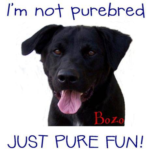

In [12]:
trans = transforms.Resize([150, 150])
trans(pil_img)

## RandomHorizontalFlip 클래스
- p 파라미터 확률로 좌우반전

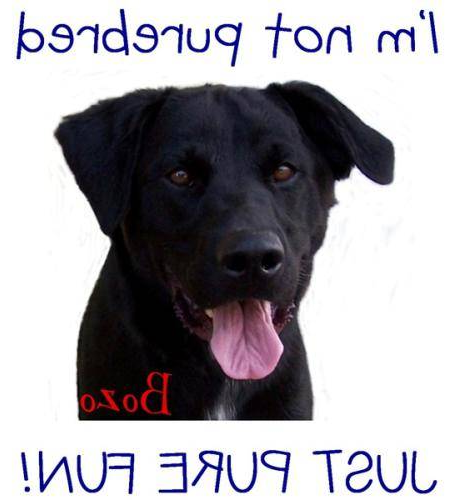

In [13]:
trans = transforms.RandomHorizontalFlip(p=1)
trans(pil_img)

## RandomVerticalFlip 클래스
- p 파라미터 확률로 상하반전

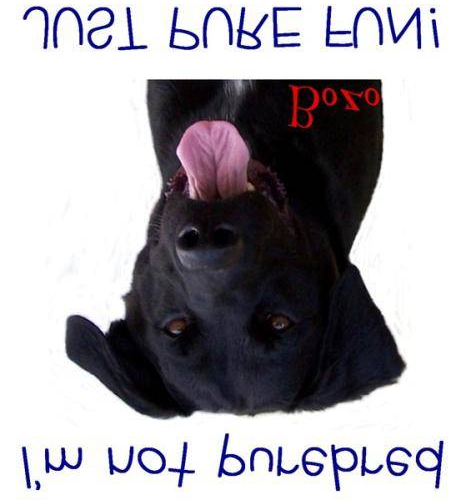

In [14]:
trans = transforms.RandomVerticalFlip(p=1)
trans(pil_img)

## RandomGrayscale 클래스
- p 파라미터 확률로 흑백 이미지로 변환

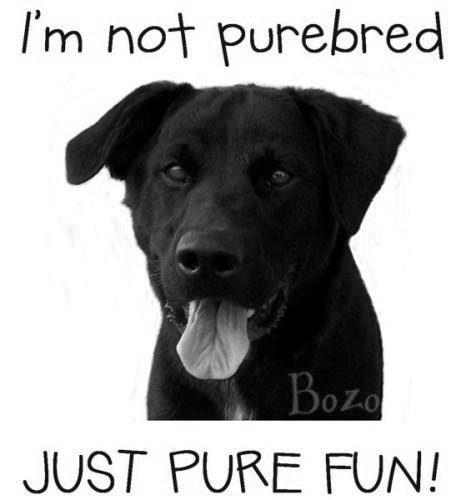

In [15]:
trans = transforms.RandomGrayscale(p=1)
trans(pil_img)

## RandomPerspective 클래스
- p 파라미터 확률로 원근변환(3차원으로 이미지 뒤틀기)
- distortion_scale: 왜곡 정도를 제어하는 파라미터
    - 0 ~ 1 사이 범위 전달
    - 1에 가까울수록 왜곡 강도 커짐

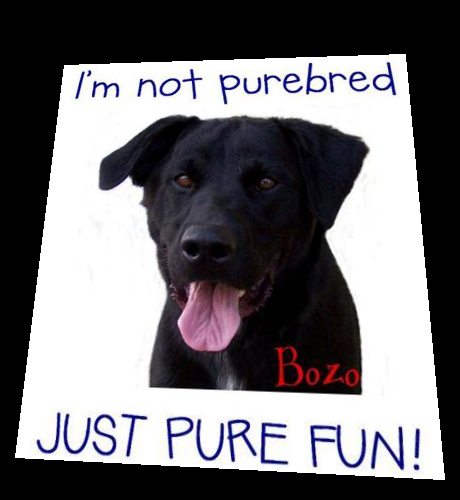

In [20]:
trans = transforms.RandomPerspective(distortion_scale=0.3, p=1)
trans(pil_img)

## RandomInvert 클래스
- p 파라미터 확률로 색상 반전

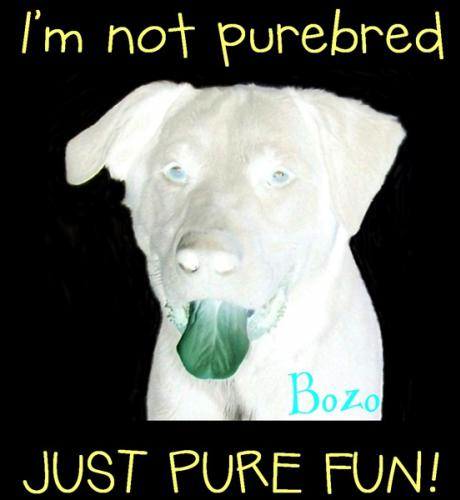

In [21]:
trans = transforms.RandomInvert(p=1)
trans(pil_img)

## RandomPosterize 클래스
- p 파라미터 확률로 포스터화

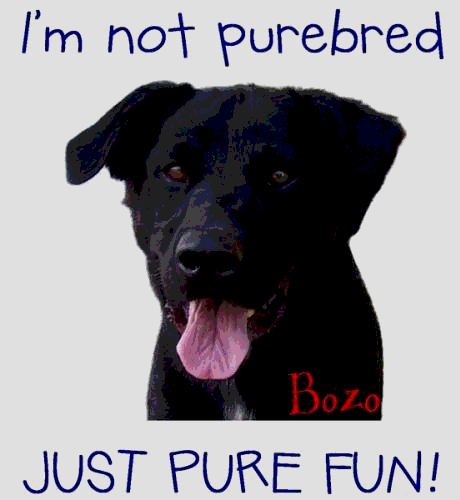

In [22]:
trans = transforms.RandomPosterize(bits=3, p=1)
trans(pil_img)

## RandomEqualize 클래스
- p 파라미터 확률로 이미지 히스토그램 균등화

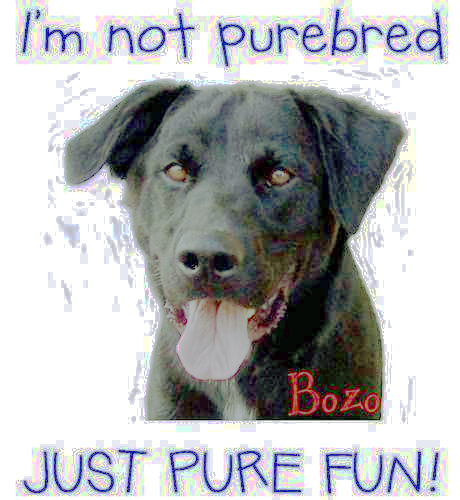

In [23]:
trans = transforms.RandomEqualize(p=1)
trans(pil_img)

## CenterCrop 클래스
- p 파라미터 없음

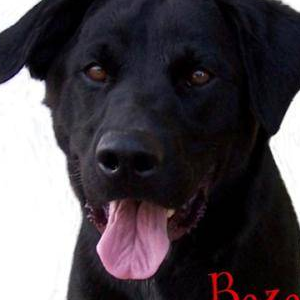

In [25]:
trans = transforms.CenterCrop([300, 300])
trans(pil_img)

## RandomResizedCrop 클래스
- 랜덤으로 crop 후 지정한 사이즈로 리사이징
- size: 랜덤으로 crop 후 리사이즈 할 크기
- scale: crop 면적에 대한 하한, 상한

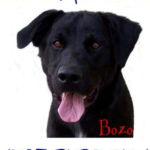

In [29]:
trans = transforms.RandomResizedCrop(size=[150, 150], scale=[0.5, 0.9])
trans(pil_img)

## RandomAffine 클래스
- degrees
    - 튜플로 전달 시 각도의 범위 지정
    - 스칼라 값으로 전달 시 -각도 ~ +각도
- scale: 아핀변환 스케일의 크기 범위(확대, 축소)

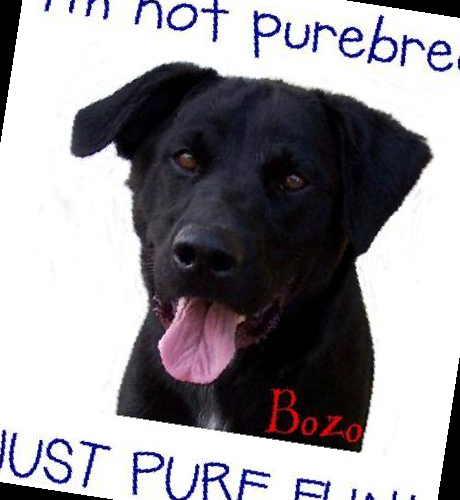

In [34]:
trans = transforms.RandomAffine(degrees=[0, 90], scale=[0.8, 1.2])
trans(pil_img)

## RandomApply 클래스
- p 파라미터 확률로 첫 번째 인수로 전달 받은 transforms 객체들을 실행

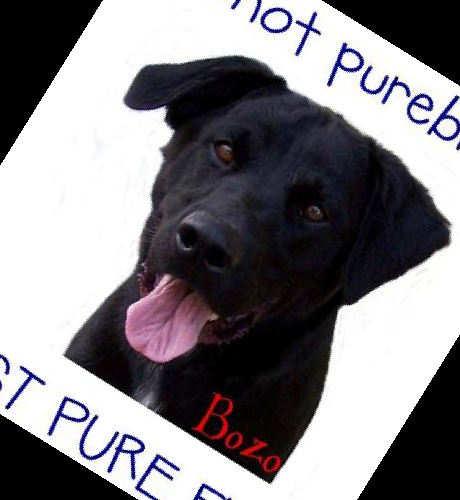

In [38]:
trans = transforms.RandomAffine(degrees=[0, 90], scale=[0.8, 1.2])
trans_apply = transforms.RandomApply([trans], p=1)
trans_apply(pil_img)

## Compose 클래스
- 여러 단계로 변환해야 하는 경우 transforms 객체들을 묶어서 순차적으로 처리되게 할 수 있음

In [39]:
# 학습용
train_transform_list = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomApply([transforms.RandomAffine(45, scale=[0.8, 1.2])], p=0.5),
    transforms.Resize([150, 150]),
    transforms.ToTensor(), # minmax / height, width, channel -> channel, height, width / float32형태 tensor
]

train_transform = transforms.Compose(train_transform_list)

# 테스트용
test_transform_list = [
    transforms.Resize([150, 150]),
    transforms.ToTensor(),
]

test_transform = transforms.Compose(test_transform_list)

# 데이터셋 클래스

In [40]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, transform, x, y=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, i):
        item = {}

        x = Image.open(self.x[i]) # pillow 이미지 객체 반환
        item["x"] = self.transform(x) # channel, height, width

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [41]:
dataset = CatDogDataset(train_transform, train_path, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)
batch = next(iter(dataloader))
batch

{'x': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000,

In [42]:
batch["x"].shape # batch, channel, height, width

torch.Size([2, 3, 150, 150])